# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
tolerance_range = 6
sazero = 1000

In [6]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [7]:
de.load_data()
de.assemble_data(tolerance_range=tolerance_range)

In [8]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 205
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 193
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 239
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 414
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 251
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 258
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 260
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 215
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 190
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 206
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 193
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 143
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 206
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 239
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 226
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 235
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 172
i: 17 	

In [9]:
dr = DataResampler()
dr.fit(de.X, de.y)
dr.restrict_zero_labels(sazero)
dr.display_information()

-------------------------------------
Current number of zero-labels: 10449
New number of zero-labels: 1000


,abs_orig,pct_orig,abs_current,pct_current
0,10449,57.45,1000,11.44
1,1197,6.58,1197,13.7
2,992,5.45,992,11.35
3,1820,10.01,1820,20.83
4,1301,7.15,1301,14.89
5,1276,7.02,1276,14.6
6,1153,6.34,1153,13.19


In [10]:
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(dr.X)
y = to_categorical(dr.y)

## 2 Train model

### 2.1  Split in train / test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [13]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Train on 5592 samples, validate on 1399 samples
Epoch 1/100
5592/5592 [==============================] - 24s 4ms/step - loss: 0.6716 - acc: 0.7704 - val_loss: 0.2283 - val_acc: 0.9371
Epoch 2/100
5592/5592 [==============================] - 12s 2ms/step - loss: 0.2215 - acc: 0.9376 - val_loss: 0.1676 - val_acc: 0.9471
Epoch 3/100
5592/5592 [==============================] - 20s 4ms/step - loss: 0.2149 - acc: 0.9428 - val_loss: 0.2009 - val_acc: 0.9407
Epoch 4/100
5592/5592 [==============================] - 19s 3ms/step - loss: 0.1700 - acc: 0.9521 - val_loss: 0.1481 - val_acc: 0.9543
Epoch 5/100
5592/5592 [==============================] - 16s 3ms/step - loss: 0.1573 - acc: 0.9546 - val_loss: 0.1491 - val_acc: 0.9500
Epoch 6/100
5592/5592 [==============================] - 14s 2ms/step - loss: 0.1587 - acc: 0.9540 - val_loss: 0.1475 - val_acc: 0.9571
Epoch 7/100
5592/5592 [==============================] - 17s 3ms/step - loss: 0.1563 - acc: 0.9540 - val_loss: 0.1701 - val_acc: 0.9478


5592/5592 [==============================] - 9s 2ms/step - loss: 0.0975 - acc: 0.9694 - val_loss: 0.1232 - val_acc: 0.9635
Epoch 69/100
5592/5592 [==============================] - 8s 1ms/step - loss: 0.0963 - acc: 0.9694 - val_loss: 0.1284 - val_acc: 0.9607
Epoch 70/100
5592/5592 [==============================] - 9s 2ms/step - loss: 0.0939 - acc: 0.9698 - val_loss: 0.1258 - val_acc: 0.9600
Epoch 71/100
5592/5592 [==============================] - 8s 1ms/step - loss: 0.0952 - acc: 0.9691 - val_loss: 0.1319 - val_acc: 0.9607
Epoch 72/100
5592/5592 [==============================] - 11s 2ms/step - loss: 0.0922 - acc: 0.9683 - val_loss: 0.1307 - val_acc: 0.9600
Epoch 73/100
5592/5592 [==============================] - 8s 1ms/step - loss: 0.0961 - acc: 0.9700 - val_loss: 0.1249 - val_acc: 0.9614
Epoch 74/100
5592/5592 [==============================] - 14s 2ms/step - loss: 0.0933 - acc: 0.9719 - val_loss: 0.1364 - val_acc: 0.9614
Epoch 75/100
5592/5592 [==============================] - 1

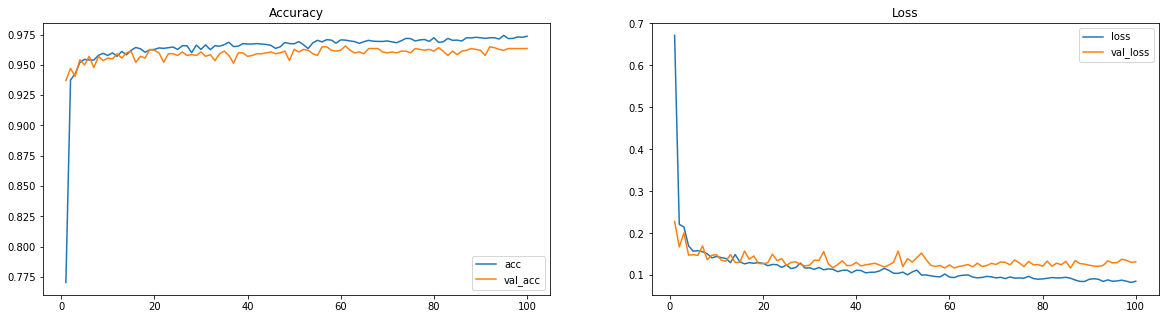

In [15]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.plot(r, history.history["val_acc"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.plot(r, history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [16]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

1748/1748 [==============================] - 2s 1ms/step
Loss:     0.13
Accuracy: 0.97


In [17]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 42 	Pred: 0 	Actual: 2 	Probability: 0.71
Index: 48 	Pred: 4 	Actual: 0 	Probability: 0.96
Index: 103 	Pred: 5 	Actual: 0 	Probability: 0.7
Index: 104 	Pred: 1 	Actual: 0 	Probability: 1.0
Index: 116 	Pred: 0 	Actual: 4 	Probability: 0.58
Index: 124 	Pred: 0 	Actual: 3 	Probability: 0.79
Index: 143 	Pred: 6 	Actual: 0 	Probability: 0.68
Index: 157 	Pred: 0 	Actual: 5 	Probability: 0.63
Index: 205 	Pred: 3 	Actual: 0 	Probability: 0.84
Index: 219 	Pred: 2 	Actual: 0 	Probability: 1.0
Index: 223 	Pred: 5 	Actual: 0 	Probability: 0.97
Index: 259 	Pred: 1 	Actual: 0 	Probability: 0.93
Index: 277 	Pred: 0 	Actual: 6 	Probability: 0.65
Index: 292 	Pred: 2 	Actual: 0 	Probability: 1.0
Index: 296 	Pred: 0 	Actual: 6 	Probability: 0.68
Index: 399 	Pred: 4 	Actual: 0 	Probability: 0.98
Index: 426 	Pred: 5 	Actual: 0 	Probability: 0.62
Index: 567 	Pred: 0 	Actual: 4 	Probability: 0.73
Index: 570 	Pred: 0 	Actual: 6 	Probability: 0.62
Index: 631 	Pred: 3 	Actual: 0 	Probability: 0.83
Index:

In [18]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 2 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 3 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 4 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 5 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 6 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 8 	Pred: 0 	Actual: 0 	Probability: 0.89
Index: 9 	Pred: 5 	Actual: 5 	Probability: 0.89
Index: 10 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 11 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 12 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 13 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 14 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 15 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 16 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 17 	Pred: 6 	Actual: 6 	Probability: 0.93
Index: 18 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 19 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 20 	Pred: 6 	Actual: 6 	Probabi

Index: 177 	Pred: 3 	Actual: 3 	Probability: 0.8
Index: 178 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 179 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 180 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 181 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 182 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 183 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 184 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 185 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 186 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 187 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 188 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 189 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 190 	Pred: 4 	Actual: 4 	Probability: 0.94
Index: 191 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 192 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 193 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 194 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 195 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 196 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 197 	Pr

Index: 353 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 354 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 355 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 356 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 357 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 358 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 359 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 360 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 361 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 362 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 363 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 364 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 365 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 366 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 367 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 368 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 369 	Pred: 4 	Actual: 4 	Probability: 0.8
Index: 370 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 371 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 372 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 373

Index: 525 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 526 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 527 	Pred: 4 	Actual: 4 	Probability: 0.97
Index: 528 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 529 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 530 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 531 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 532 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 533 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 534 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 535 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 536 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 537 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 538 	Pred: 2 	Actual: 2 	Probability: 0.75
Index: 539 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 540 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 541 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 542 	Pred: 1 	Actual: 1 	Probability: 0.91
Index: 543 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 544 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 545 

Index: 700 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 701 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 702 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 703 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 704 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 705 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 706 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 707 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 708 	Pred: 3 	Actual: 3 	Probability: 0.82
Index: 709 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 710 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 711 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 712 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 713 	Pred: 6 	Actual: 6 	Probability: 0.85
Index: 714 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 715 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 716 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 717 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 718 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 719 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 720 

Index: 880 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 881 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 882 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 883 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 884 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 885 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 886 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 888 	Pred: 0 	Actual: 0 	Probability: 0.77
Index: 889 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 890 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 891 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 892 	Pred: 4 	Actual: 4 	Probability: 0.8
Index: 893 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 894 	Pred: 6 	Actual: 6 	Probability: 0.96
Index: 895 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 896 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 897 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 898 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 899 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 900 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 901 

Index: 1055 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1056 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1057 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1058 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1059 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1060 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1061 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1062 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1063 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1064 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1065 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1066 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1067 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1068 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1069 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1070 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1071 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1072 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1073 	Pred: 3 	Actual: 3 	Probability: 0.87
Index: 1074 	Pred: 6 	Actual: 6 	Probability

Index: 1227 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 1228 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1229 	Pred: 1 	Actual: 1 	Probability: 0.91
Index: 1230 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1231 	Pred: 4 	Actual: 4 	Probability: 0.9
Index: 1232 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1233 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1234 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1235 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 1236 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1237 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1238 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1239 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1240 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1241 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1242 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1243 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1244 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 1245 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1246 	Pred: 3 	Actual: 3 	Probability: 

Index: 1398 	Pred: 2 	Actual: 2 	Probability: 0.93
Index: 1399 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1400 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1401 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1402 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1403 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 1404 	Pred: 6 	Actual: 6 	Probability: 0.95
Index: 1405 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 1406 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1407 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1408 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1409 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1410 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1411 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 1412 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1413 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1414 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1415 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1416 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1417 	Pred: 4 	Actual: 4 	Probabili

Index: 1570 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1571 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1572 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1573 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1574 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1576 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 1577 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1578 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1579 	Pred: 0 	Actual: 0 	Probability: 0.88
Index: 1580 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1581 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1582 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1583 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1584 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1586 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1587 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1588 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1589 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1590 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1591 	Pred: 6 	Actual: 6 	Probabili

Index: 1739 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1740 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1741 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1742 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1743 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 1744 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1745 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 1746 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1747 	Pred: 2 	Actual: 2 	Probability: 1.0


### 2.4 Save model

In [19]:
from keras.models import load_model
import h5py
model.save('models/model_gesture_lstm_nip120_tr' + str(tolerance_range) + '_sazero' + str(sazero) + '.h5')